<a href="https://colab.research.google.com/github/YADHUSUDHAN/AIL411-DEEP-LEARNING-LAB-KTU/blob/main/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:

import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Load and preprocess the MNIST dataset

In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normalize pixel values to be in the range [0, 1]

In [ ]:

x_train = x_train / 255.0
x_test = x_test / 255.0


# One-hot encode the labels

In [ ]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Create a LeNet-like CNN model

In [ ]:

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))


# Compile the model

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model with a validation split

In [ ]:

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 25s 32ms/step - loss: 0.2811 - accuracy: 0.9162 - val_loss: 0.1069 - val_accuracy: 0.9688
Epoch 2/10
750/750 [==============================] - 24s 33ms/step - loss: 0.0805 - accuracy: 0.9752 - val_loss: 0.0669 - val_accuracy: 0.9797
Epoch 3/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0575 - accuracy: 0.9822 - val_loss: 0.0632 - val_accuracy: 0.9822
Epoch 4/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 5/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.0514 - val_accuracy: 0.9848
Epoch 6/10
750/750 [==============================] - 26s 34ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0502 - val_accuracy: 0.9852
Epoch 7/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0435 - val_accuracy:

# Evaluate the model on the test dataset

In [ ]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 2s 6ms/step - loss: 0.0386 - accuracy: 0.9879
Test accuracy: 98.79%


# Make predictions on new images

In [ ]:

predictions = model.predict(x_test)


313/313 [==============================] - 2s 6ms/step


# Plot some example images along with their predicted and actual labels


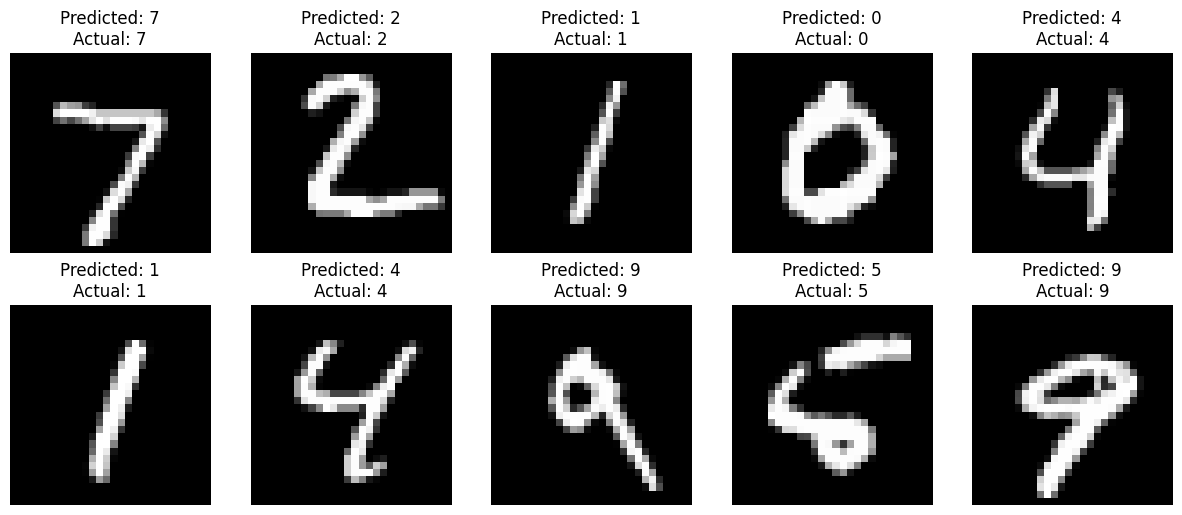

In [ ]:
n_samples = 10
plt.figure(figsize=(15, 6))
for i in range(n_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.show()
